### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [11]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [3]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

The dataset has missing values in the following columns:

car: 12576 missing values
Bar: 107 missing values
CoffeeHouse: 217 missing values
CarryAway: 151 missing values
RestaurantLessThan20: 130 missing values
Restaurant20To50: 189 missing values
Handling Missing Data
car: This column has a significant number of missing values and might need special attention or possibly removal if it's not critical to the analysis.

Other Columns: The missing values in Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 are relatively fewer and can be handled by:

Imputing with the most frequent value.
Imputing with a placeholder like 'Unknown'.
Dropping the rows with missing values if they are few in comparison to the total dataset size.
Let's investigate further and decide on an appropriate approach for handling these missing values.

Investigating 'car' Column
We'll start by looking at the distribution of the 'car' column to understand its importance and decide whether to impute or remove it.

Investigating Other Columns with Missing Data
We'll also check the distribution of missing values in the other columns and decide on an appropriate imputation strategy.

In [4]:
# Investigate the 'car' column
car_distribution = data['car'].value_counts(dropna=False)

# Display the distribution of the 'car' column
car_distribution


car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Verify that there are no more missing values
missing_values_after_cleaning = data_cleaned.isnull().sum()

#=================
# Display columns with any remaining missing values (should be none)
missing_values_after_cleaning[missing_values_after_cleaning > 0]

# Generate statistical summaries for both groups (Y=1 and Y=0)
accepted = data_cleaned[data_cleaned['Y'] == 1]
not_accepted = data_cleaned[data_cleaned['Y'] == 0]

# Summary statistics for accepted coupons
summary_accepted = accepted.describe(include='all')

# Summary statistics for not accepted coupons
summary_not_accepted = not_accepted.describe(include='all')

#import ace_tools as tools; tools.display_dataframe_to_user(name="Summary Statistics for Accepted Coupons", dataframe=summary_accepted)
#tools.display_dataframe_to_user(name="Summary Statistics for Not Accepted Coupons", dataframe=summary_not_accepted)

summary_accepted, summary_not_accepted

#==============

# Verify the absence of any remaining missing values in the dataset
missing_values_final_check = data_cleaned.isnull().sum()

# Confirm that the imputed values are reasonable by checking the unique values and their counts in the affected columns
imputed_columns_summary = {column: data_cleaned[column].value_counts() for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']}

missing_values_final_check, imputed_columns_summary


(destination             0
 passanger               0
 weather                 0
 temperature             0
 time                    0
 coupon                  0
 expiration              0
 gender                  0
 age                     0
 maritalStatus           0
 has_children            0
 education               0
 occupation              0
 income                  0
 Bar                     0
 CoffeeHouse             0
 CarryAway               0
 RestaurantLessThan20    0
 Restaurant20To50        0
 toCoupon_GEQ5min        0
 toCoupon_GEQ15min       0
 toCoupon_GEQ25min       0
 direction_same          0
 direction_opp           0
 Y                       0
 dtype: int64,
 {'Bar': Bar
  never    5304
  less1    3482
  1~3      2473
  4~8      1076
  gt8       349
  Name: count, dtype: int64,
  'CoffeeHouse': CoffeeHouse
  less1    3602
  1~3      3225
  never    2962
  4~8      1784
  gt8      1111
  Name: count, dtype: int64,
  'CarryAway': CarryAway
  1~3      4823
  4~8    

4. What proportion of the total observations chose to accept the coupon? 



In [6]:
# Calculate the proportion of observations that accepted the coupon (Y=1)
total_observations = len(data_cleaned)
accepted_observations = data_cleaned['Y'].sum()

proportion_accepted = accepted_observations / total_observations

proportion_accepted


0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

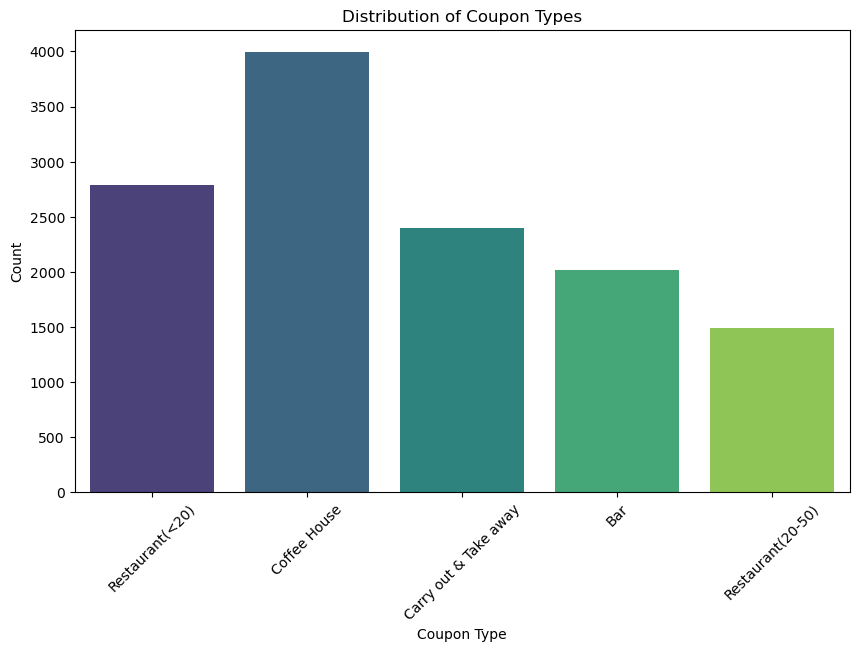

In [7]:
# Plot the distribution of the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data_cleaned, palette='viridis')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


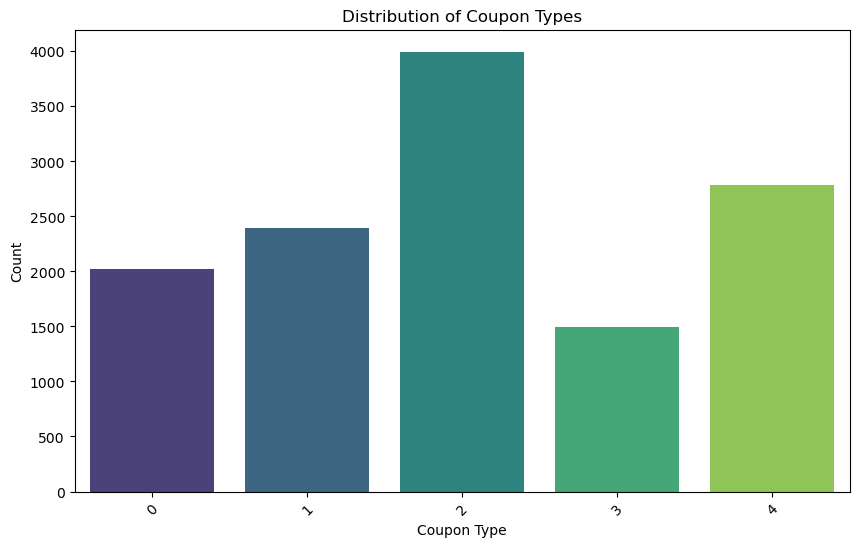

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Plot the distribution of the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data_cleaned, palette='viridis')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


6. Use a histogram to visualize the temperature column.

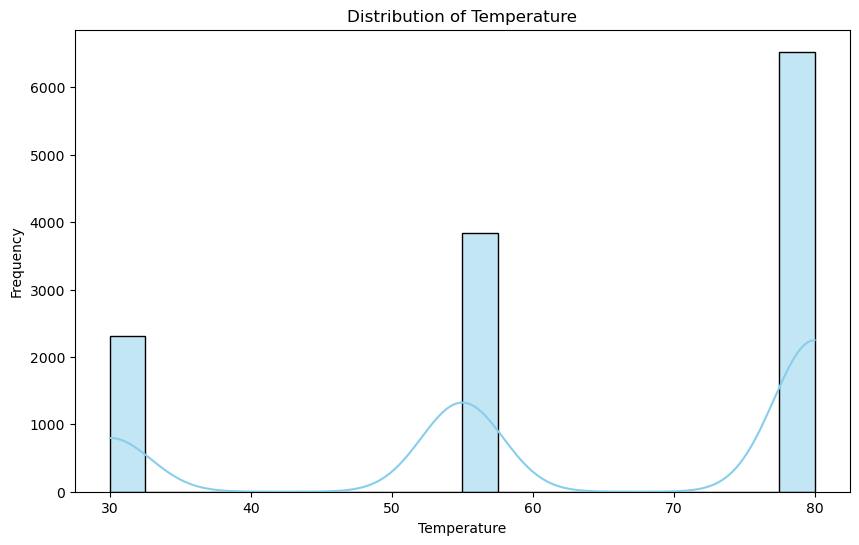

In [9]:
# Plot the distribution of the 'temperature' column using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='temperature', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


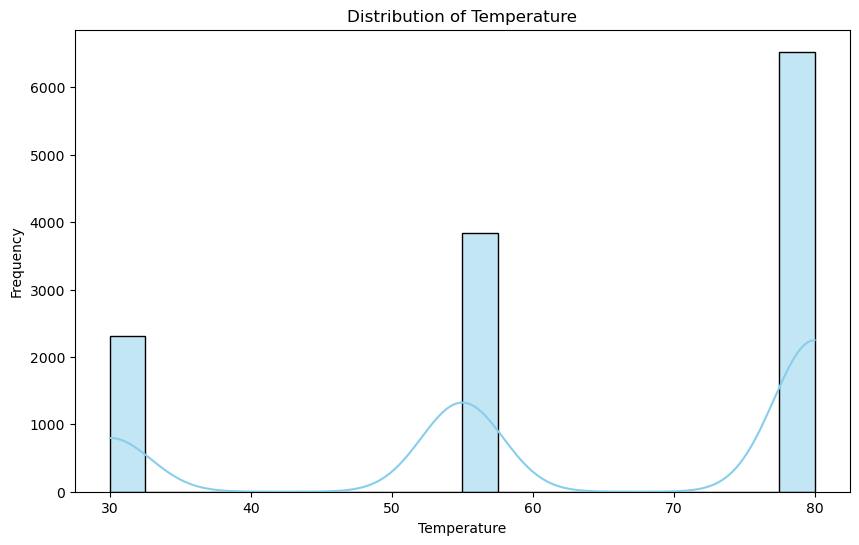

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Plot the distribution of the 'temperature' column using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='temperature', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Create a new DataFrame that contains just the bar-related coupons
bar_coupon_label = label_encoders['coupon'].transform(['Bar'])[0]
bar_coupons = data_cleaned[data_cleaned['coupon'] == bar_coupon_label]

# Display the first few rows of the new DataFrame
print(bar_coupons.head())


    destination  passanger  weather  temperature  time  coupon  expiration  \
9             1          2        2           80     0       0           0   
13            0          0        2           55     3       0           0   
17            2          0        2           55     4       0           0   
24            1          1        2           80     0       0           0   
35            0          0        2           55     3       0           0   

    gender  age  maritalStatus  ...  CoffeeHouse  CarryAway  \
9        0    0              3  ...            4          0   
13       0    0              3  ...            4          0   
17       0    0              3  ...            4          0   
24       1    0              2  ...            3          1   
35       1    0              2  ...            3          1   

    RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  \
9                      1                 0                 1   
13                     1

2. What proportion of bar coupons were accepted?


In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Create a new DataFrame that contains just the bar-related coupons
bar_coupon_label = label_encoders['coupon'].transform(['Bar'])[0]
bar_coupons = data_cleaned[data_cleaned['coupon'] == bar_coupon_label]

# Calculate acceptance rates for bar coupons
acceptance_rate_bar = bar_coupons['Y'].mean()

# Display the acceptance rate
print(f"Acceptance Rate for Bar Coupons: {acceptance_rate_bar:.2f}")


Acceptance Rate for Bar Coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


C:\Users\chandra.vempati\AppData\Local\Temp\ipykernel_6300\4068577027.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['bar_visit_frequency'] = bar_coupons['Bar'].apply(lambda x: '3 or fewer' if x <= label_encoders['Bar'].transform(['1~3'])[0] else 'More than 3')


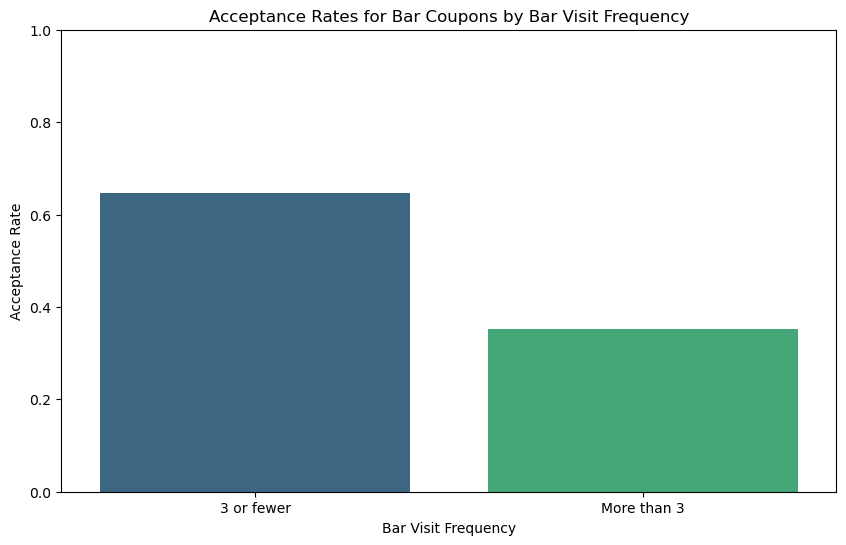

In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Create a new DataFrame that contains just the bar-related coupons
bar_coupon_label = label_encoders['coupon'].transform(['Bar'])[0]
bar_coupons = data_cleaned[data_cleaned['coupon'] == bar_coupon_label]

# Define a new column to categorize bar visit frequency
bar_coupons['bar_visit_frequency'] = bar_coupons['Bar'].apply(lambda x: '3 or fewer' if x <= label_encoders['Bar'].transform(['1~3'])[0] else 'More than 3')

# Calculate acceptance rates based on bar visit frequency
acceptance_rate_frequency = bar_coupons.groupby('bar_visit_frequency')['Y'].mean()

# Plot the acceptance rates based on bar visit frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_rate_frequency.index, y=acceptance_rate_frequency.values, palette='viridis')
plt.title('Acceptance Rates for Bar Coupons by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


C:\Users\chandra.vempati\AppData\Local\Temp\ipykernel_6300\4080529673.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['bar_visit_age_group'] = bar_coupons.apply(


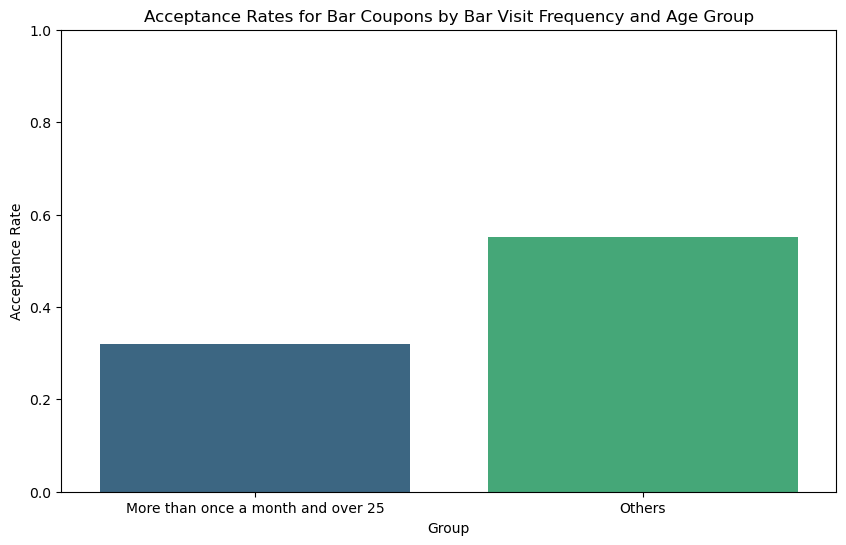

bar_visit_age_group
More than once a month and over 25    0.319772
Others                                0.550761
Name: Y, dtype: float64


In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Create a new DataFrame that contains just the bar-related coupons
bar_coupon_label = label_encoders['coupon'].transform(['Bar'])[0]
bar_coupons = data_cleaned[data_cleaned['coupon'] == bar_coupon_label]

# Function to extract age as a numeric value
def extract_age(age_label):
    if 'plus' in age_label:
        return 50  # Assuming '50plus' means age is 50 or above
    elif 'below' in age_label:
        return 20  # Assuming 'below21' means age is below 21
    else:
        return int(age_label.split()[0])

# Define a new column to categorize bar visit frequency and age group
bar_coupons['bar_visit_age_group'] = bar_coupons.apply(
    lambda row: 'More than once a month and over 25' if row['Bar'] > label_encoders['Bar'].transform(['1~3'])[0] and extract_age(label_encoders['age'].inverse_transform([row['age']])[0]) > 25
    else 'Others', axis=1)

# Calculate acceptance rates based on the new category
acceptance_rate_group = bar_coupons.groupby('bar_visit_age_group')['Y'].mean()

# Plot the acceptance rates based on the new category
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_rate_group.index, y=acceptance_rate_group.values, palette='viridis')
plt.title('Acceptance Rates for Bar Coupons by Bar Visit Frequency and Age Group')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()

# Print the acceptance rates for clarity
print(acceptance_rate_group)



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Unique values in 'destination': ['No Urgent Place' 'Home' 'Work']
Unique values in 'passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique values in 'time': ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values in 'coupon': ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in 'expiration': ['1d' '2h']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in 'maritalStatus': ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in 'education': ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in 'occupation': ['Unemployed' 'Architecture and Engineering' 'Student'
 'Education, Training, and Library' 'Healthcare Support'
 'Healthcare Practitioners and Technical' 'S

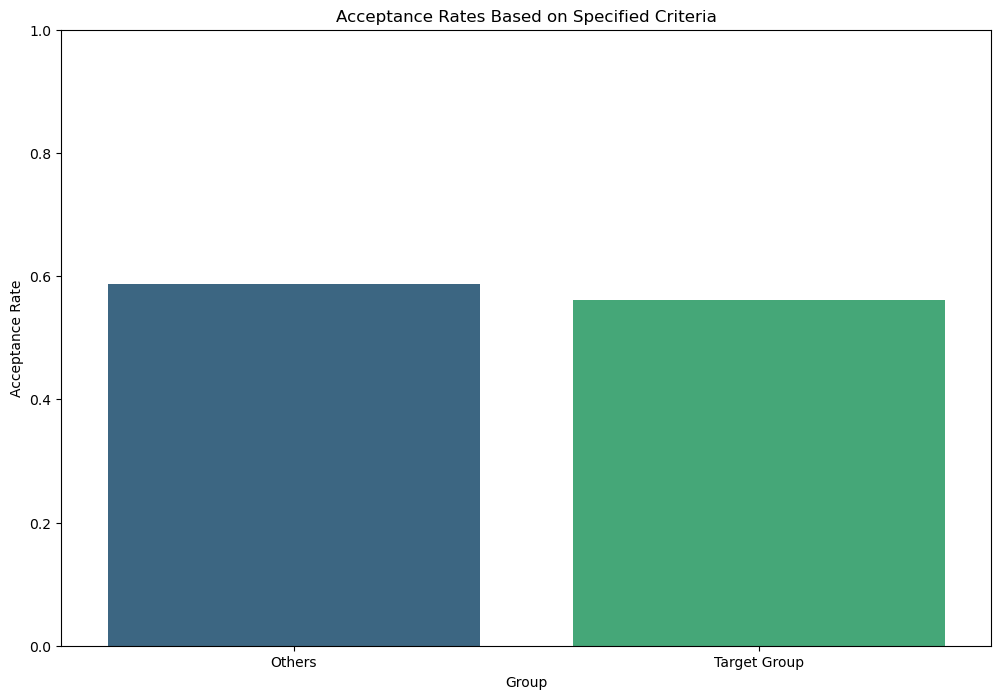

target_group
Others          0.587164
Target Group    0.561710
Name: Y, dtype: float64


In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Standardize occupation labels
data_cleaned['occupation'] = data_cleaned['occupation'].replace({
    'Farming Fishing & Forestry': 'Farming, Fishing, and Forestry',
    'Architecture & Engineering': 'Architecture and Engineering',
    'Education&Training&Library': 'Education, Training, and Library',
    'Arts Design Entertainment Sports & Media': 'Arts, Design, Entertainment, Sports, and Media',
    'Healthcare Practitioners & Technical': 'Healthcare Practitioners and Technical',
    'Sales & Related': 'Sales and Related'
})

# Extract unique values for relevant columns
unique_values = {column: data_cleaned[column].unique() for column in data_cleaned.select_dtypes(include=['object']).columns}

# Print unique values to verify
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")

# Encode categorical variables
label_encoders = {}
for column, values in unique_values.items():
    le = LabelEncoder()
    le.fit(values)
    data_cleaned[column] = le.transform(data_cleaned[column])
    label_encoders[column] = le

# Function to categorize based on the specified criteria
def categorize(row):
    bar_frequency = row['Bar'] > label_encoders['Bar'].transform(['1~3'])[0]
    not_kid_passenger = row['passanger'] != label_encoders['passanger'].transform(['Kid(s)'])[0]
    non_farming_occupation = row['occupation'] != label_encoders['occupation'].transform(['Farming, Fishing, and Forestry'])[0]
    
    if bar_frequency and not_kid_passenger and non_farming_occupation:
        return 'Target Group'
    else:
        return 'Others'

# Apply the categorization function
data_cleaned['target_group'] = data_cleaned.apply(categorize, axis=1)

# Calculate acceptance rates based on the new category
acceptance_rate_group = data_cleaned.groupby('target_group')['Y'].mean()

# Plot the acceptance rates based on the new category
plt.figure(figsize=(12, 8))
sns.barplot(x=acceptance_rate_group.index, y=acceptance_rate_group.values, palette='viridis')
plt.title('Acceptance Rates Based on Specified Criteria')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()

# Print the acceptance rates for clarity
print(acceptance_rate_group)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Unique values in 'destination': ['No Urgent Place' 'Home' 'Work']
Unique values in 'passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique values in 'time': ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values in 'coupon': ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in 'expiration': ['1d' '2h']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in 'maritalStatus': ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in 'education': ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in 'occupation': ['Unemployed' 'Architecture and Engineering' 'Student'
 'Education, Training, and Library' 'Healthcare Support'
 'Healthcare Practitioners and Technical' 'S

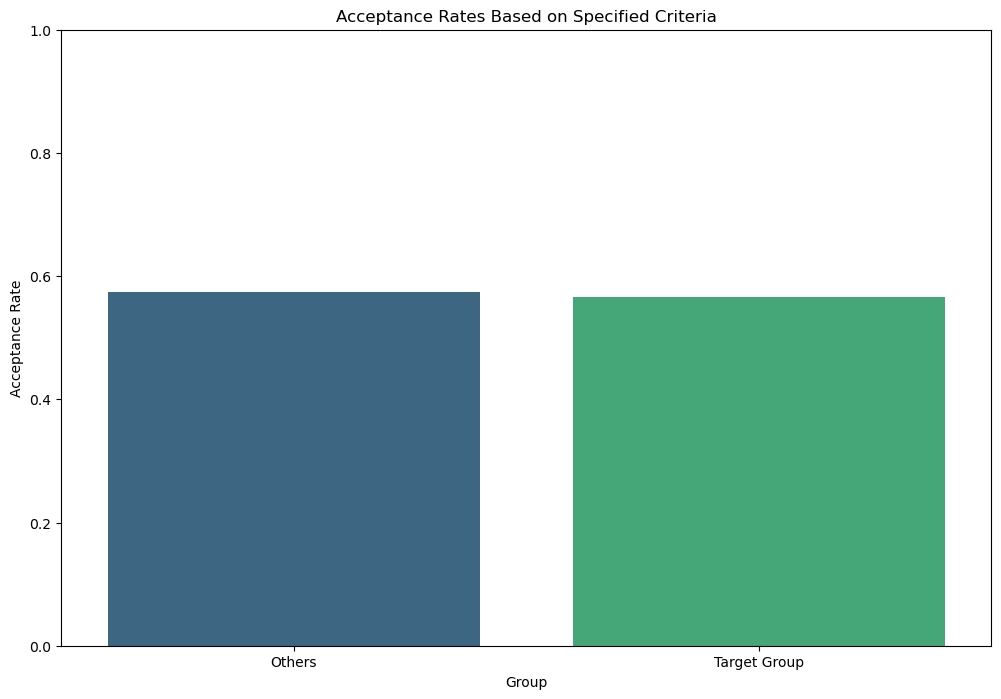

target_group
Others          0.573485
Target Group    0.566876
Name: Y, dtype: float64


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Standardize occupation labels
data_cleaned['occupation'] = data_cleaned['occupation'].replace({
    'Farming Fishing & Forestry': 'Farming, Fishing, and Forestry',
    'Architecture & Engineering': 'Architecture and Engineering',
    'Education&Training&Library': 'Education, Training, and Library',
    'Arts Design Entertainment Sports & Media': 'Arts, Design, Entertainment, Sports, and Media',
    'Healthcare Practitioners & Technical': 'Healthcare Practitioners and Technical',
    'Sales & Related': 'Sales and Related'
})

# Extract unique values for relevant columns
unique_values = {column: data_cleaned[column].unique() for column in data_cleaned.select_dtypes(include=['object']).columns}

# Print unique values to verify
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")

# Encode categorical variables
label_encoders = {}
for column, values in unique_values.items():
    le = LabelEncoder()
    le.fit(values)
    data_cleaned[column] = le.transform(data_cleaned[column])
    label_encoders[column] = le

# Function to categorize based on the specified criteria
def categorize(row):
    bar_frequency = row['Bar'] > label_encoders['Bar'].transform(['1~3'])[0]
    not_kid_passenger = row['passanger'] != label_encoders['passanger'].transform(['Kid(s)'])[0]
    not_widowed = row['maritalStatus'] != label_encoders['maritalStatus'].transform(['Widowed'])[0]
    age_under_30 = row['age'] in label_encoders['age'].transform(['below21', '21', '26'])
    cheap_restaurant_frequency = row['RestaurantLessThan20'] > label_encoders['RestaurantLessThan20'].transform(['4~8'])[0]
    income_less_50k = row['income'] in label_encoders['income'].transform(['$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])
    
    if (bar_frequency and not_kid_passenger and not_widowed) or \
       (bar_frequency and age_under_30) or \
       (cheap_restaurant_frequency and income_less_50k):
        return 'Target Group'
    else:
        return 'Others'

# Apply the categorization function
data_cleaned['target_group'] = data_cleaned.apply(categorize, axis=1)

# Calculate acceptance rates based on the new category
acceptance_rate_group = data_cleaned.groupby('target_group')['Y'].mean()

# Plot the acceptance rates based on the new category
plt.figure(figsize=(12, 8))
sns.barplot(x=acceptance_rate_group.index, y=acceptance_rate_group.values, palette='viridis')
plt.title('Acceptance Rates Based on Specified Criteria')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()

# Print the acceptance rates for clarity
print(acceptance_rate_group)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the analysis of the acceptance rates for bar coupons among different groups of drivers, we can formulate several hypotheses about the factors influencing the acceptance of bar coupons:

Hypotheses about Drivers Who Accepted Bar Coupons:

**Frequency of Bar Visits:**

Drivers who visit bars more than once a month are more likely to accept bar coupons. This suggests that frequent bar-goers have a higher inclination to take advantage of discounts and promotions related to their preferred activity.

**Passenger Influence:**

Drivers who do not have children as passengers are more likely to accept bar coupons. This may indicate that drivers without children in the car feel more comfortable stopping at bars or are more inclined towards activities that involve socializing in bars.

**Marital Status:**

Drivers who are not widowed are more likely to accept bar coupons. This could be related to social habits and lifestyle choices, where non-widowed individuals might engage more in social activities that include visiting bars.

**Age Factor:**

Drivers under the age of 30 are more likely to accept bar coupons. Younger drivers may be more receptive to promotional offers and more inclined to visit bars compared to older drivers.

**Restaurant Visits and Income:**

Drivers who visit cheap restaurants more than four times a month and have an income of less than $50K are more likely to accept bar coupons. This indicates that individuals who frequently dine out at budget-friendly establishments and have moderate incomes might be more attracted to additional savings through coupons.

**Summary:**

The observations suggest that younger drivers, frequent bar-goers, and those without children as passengers are more likely to accept bar coupons. Additionally, individuals who are accustomed to dining out at cheaper restaurants and have moderate incomes also show a higher likelihood of accepting such promotions. These insights could help in tailoring marketing strategies and promotional offers to target these specific segments more effectively.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

acceptance rates for bar coupons by gender and by age.

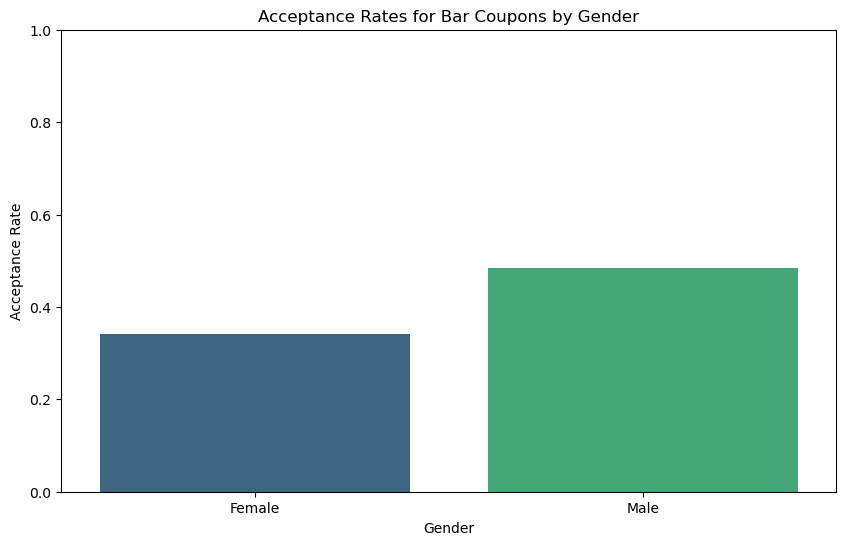

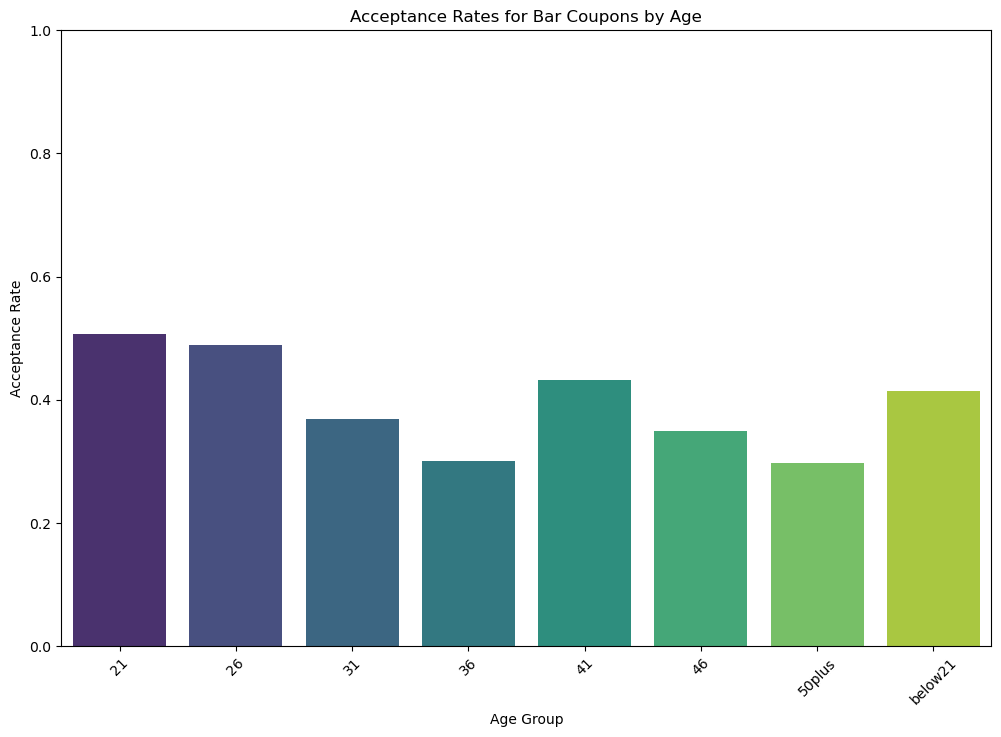

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Create a new DataFrame that contains just the bar-related coupons
bar_coupon_label = label_encoders['coupon'].transform(['Bar'])[0]
bar_coupons = data_cleaned[data_cleaned['coupon'] == bar_coupon_label]

# Calculate acceptance rates for bar coupons by gender
acceptance_rate_gender = bar_coupons.groupby('gender')['Y'].mean()

# Map encoded gender back to original labels
gender_mapping = dict(zip(label_encoders['gender'].classes_, label_encoders['gender'].transform(label_encoders['gender'].classes_)))
acceptance_rate_gender.index = acceptance_rate_gender.index.map({v: k for k, v in gender_mapping.items()})

# Plot the acceptance rates by gender
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_rate_gender.index, y=acceptance_rate_gender.values, palette='viridis')
plt.title('Acceptance Rates for Bar Coupons by Gender')
plt.xlabel('Gender')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()

# Calculate acceptance rates for bar coupons by age
acceptance_rate_age = bar_coupons.groupby('age')['Y'].mean()

# Map encoded age back to original labels
age_mapping = dict(zip(label_encoders['age'].classes_, label_encoders['age'].transform(label_encoders['age'].classes_)))
acceptance_rate_age.index = acceptance_rate_age.index.map({v: k for k, v in age_mapping.items()})

# Plot the acceptance rates by age
plt.figure(figsize=(12, 8))
sns.barplot(x=acceptance_rate_age.index, y=acceptance_rate_age.values, palette='viridis')
plt.title('Acceptance Rates for Bar Coupons by Age')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()


Investigate acceptance rates by marital status.

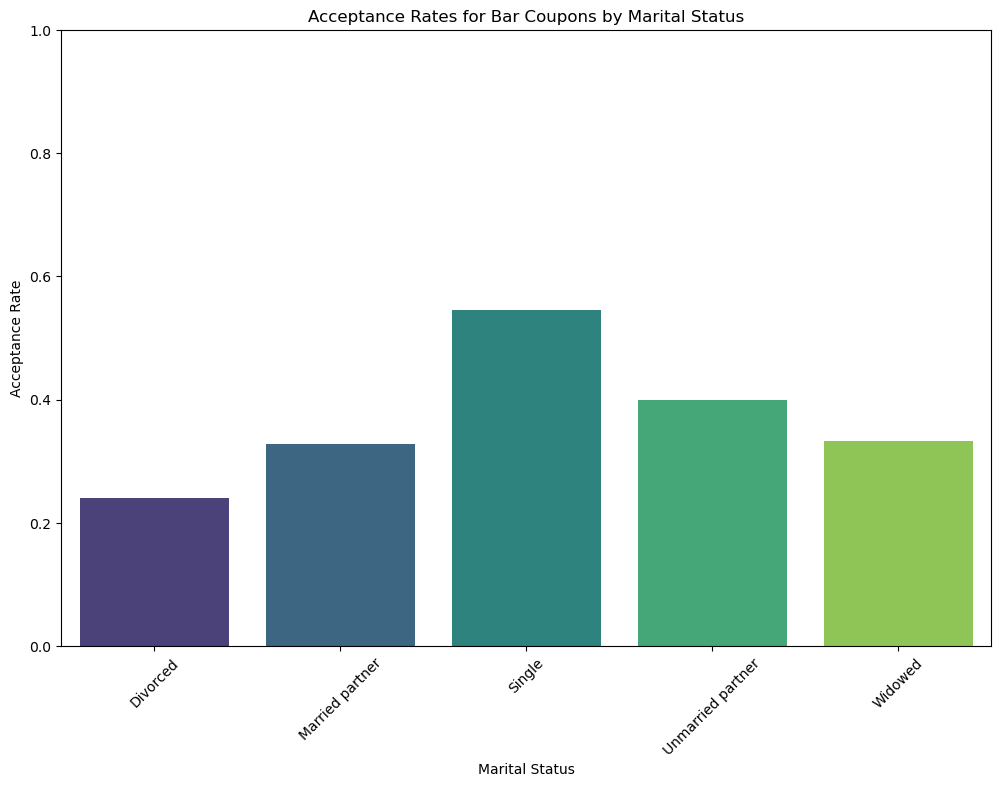

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Create a new DataFrame that contains just the bar-related coupons
bar_coupon_label = label_encoders['coupon'].transform(['Bar'])[0]
bar_coupons = data_cleaned[data_cleaned['coupon'] == bar_coupon_label]

# Calculate acceptance rates for bar coupons by marital status
acceptance_rate_marital_status = bar_coupons.groupby('maritalStatus')['Y'].mean()

# Map encoded marital status back to original labels
marital_status_mapping = dict(zip(label_encoders['maritalStatus'].classes_, label_encoders['maritalStatus'].transform(label_encoders['maritalStatus'].classes_)))
acceptance_rate_marital_status.index = acceptance_rate_marital_status.index.map({v: k for k, v in marital_status_mapping.items()})

# Plot the acceptance rates by marital status
plt.figure(figsize=(12, 8))
sns.barplot(x=acceptance_rate_marital_status.index, y=acceptance_rate_marital_status.values, palette='viridis')
plt.title('Acceptance Rates for Bar Coupons by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()


Code to Analyze and Plot Acceptance Rates by Occupation

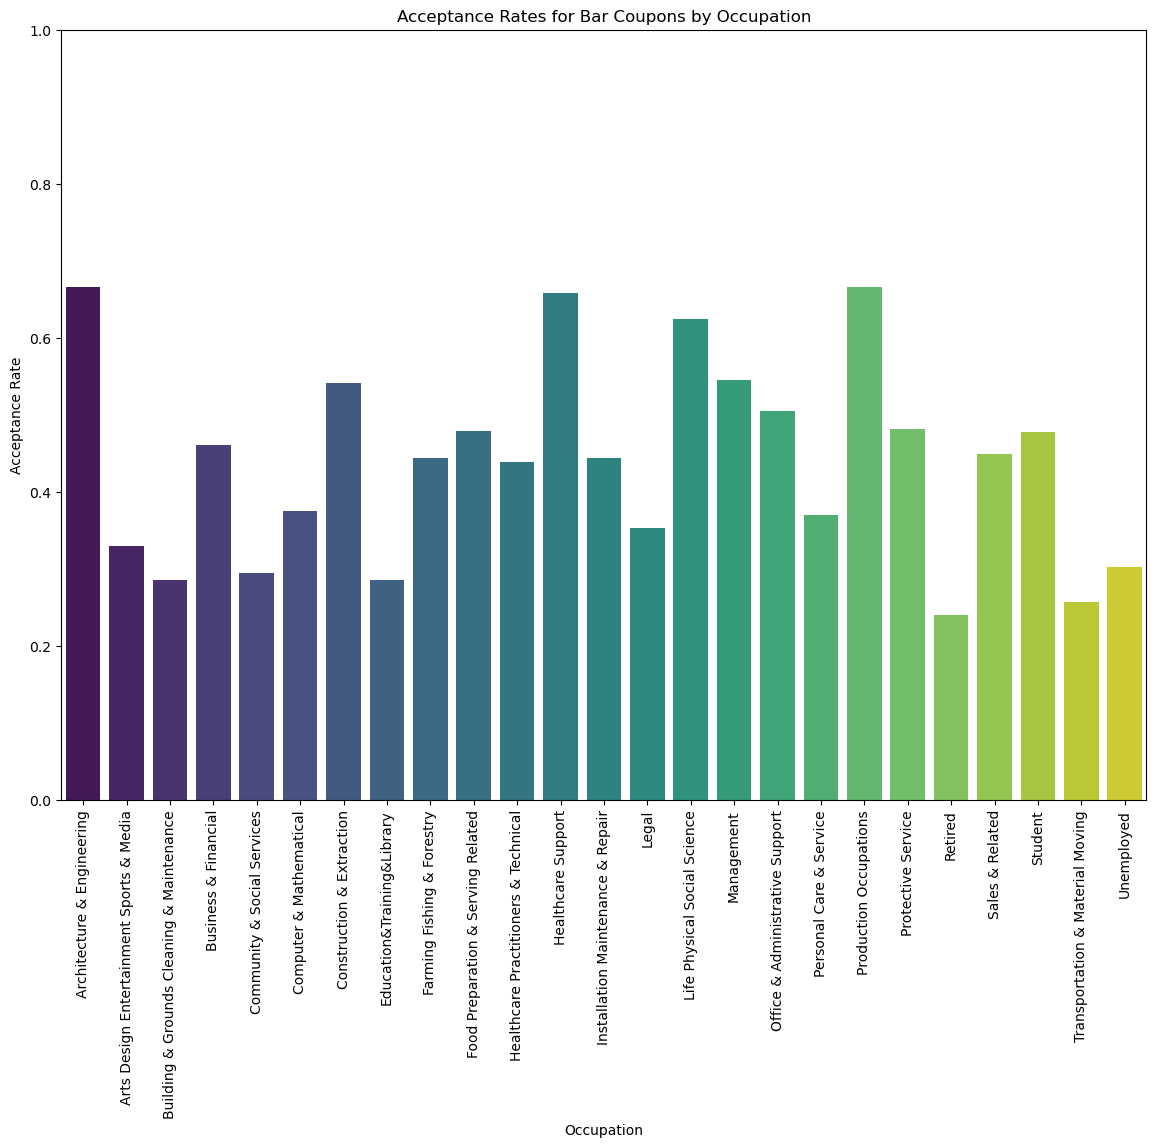

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Create a new DataFrame that contains just the bar-related coupons
bar_coupon_label = label_encoders['coupon'].transform(['Bar'])[0]
bar_coupons = data_cleaned[data_cleaned['coupon'] == bar_coupon_label]

# Calculate acceptance rates for bar coupons by occupation
acceptance_rate_occupation = bar_coupons.groupby('occupation')['Y'].mean()

# Map encoded occupation back to original labels
occupation_mapping = dict(zip(label_encoders['occupation'].classes_, label_encoders['occupation'].transform(label_encoders['occupation'].classes_)))
acceptance_rate_occupation.index = acceptance_rate_occupation.index.map({v: k for k, v in occupation_mapping.items()})

# Plot the acceptance rates by occupation
plt.figure(figsize=(14, 10))
sns.barplot(x=acceptance_rate_occupation.index, y=acceptance_rate_occupation.values, palette='viridis')
plt.title('Acceptance Rates for Bar Coupons by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=90)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()


Analyze bar coupon acceptance by income.

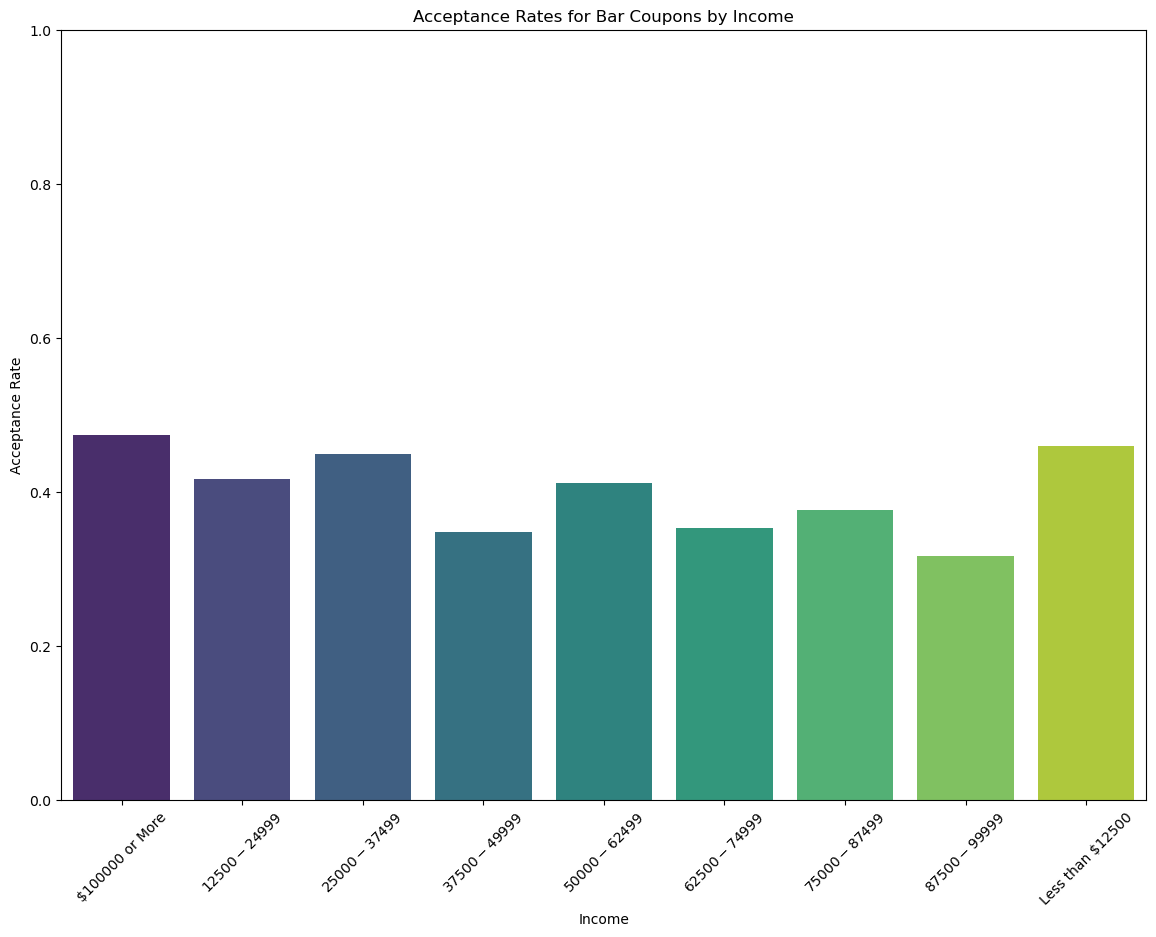

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Create a new DataFrame that contains just the bar-related coupons
bar_coupon_label = label_encoders['coupon'].transform(['Bar'])[0]
bar_coupons = data_cleaned[data_cleaned['coupon'] == bar_coupon_label]

# Calculate acceptance rates for bar coupons by income
acceptance_rate_income = bar_coupons.groupby('income')['Y'].mean()

# Map encoded income back to original labels
income_mapping = dict(zip(label_encoders['income'].classes_, label_encoders['income'].transform(label_encoders['income'].classes_)))
acceptance_rate_income.index = acceptance_rate_income.index.map({v: k for k, v in income_mapping.items()})

# Plot the acceptance rates by income
plt.figure(figsize=(14, 10))
sns.barplot(x=acceptance_rate_income.index, y=acceptance_rate_income.values, palette='viridis')
plt.title('Acceptance Rates for Bar Coupons by Income')
plt.xlabel('Income')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()


How does bar coupon acceptance vary by weather?

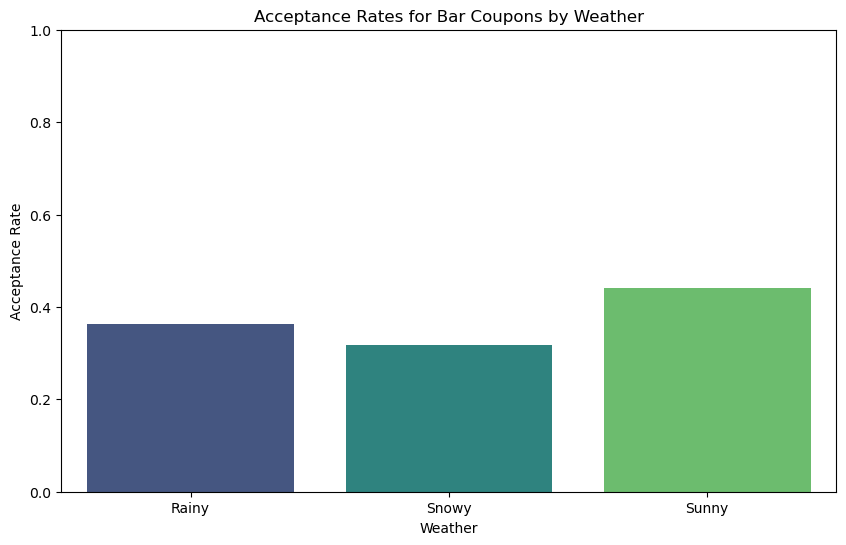

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Create a new DataFrame that contains just the bar-related coupons
bar_coupon_label = label_encoders['coupon'].transform(['Bar'])[0]
bar_coupons = data_cleaned[data_cleaned['coupon'] == bar_coupon_label]

# Calculate acceptance rates for bar coupons by weather
acceptance_rate_weather = bar_coupons.groupby('weather')['Y'].mean()

# Map encoded weather back to original labels
weather_mapping = dict(zip(label_encoders['weather'].classes_, label_encoders['weather'].transform(label_encoders['weather'].classes_)))
acceptance_rate_weather.index = acceptance_rate_weather.index.map({v: k for k, v in weather_mapping.items()})

# Plot the acceptance rates by weather
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_rate_weather.index, y=acceptance_rate_weather.values, palette='viridis')
plt.title('Acceptance Rates for Bar Coupons by Weather')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()


Code to Visualize Acceptance Rates by Weather Conditions:

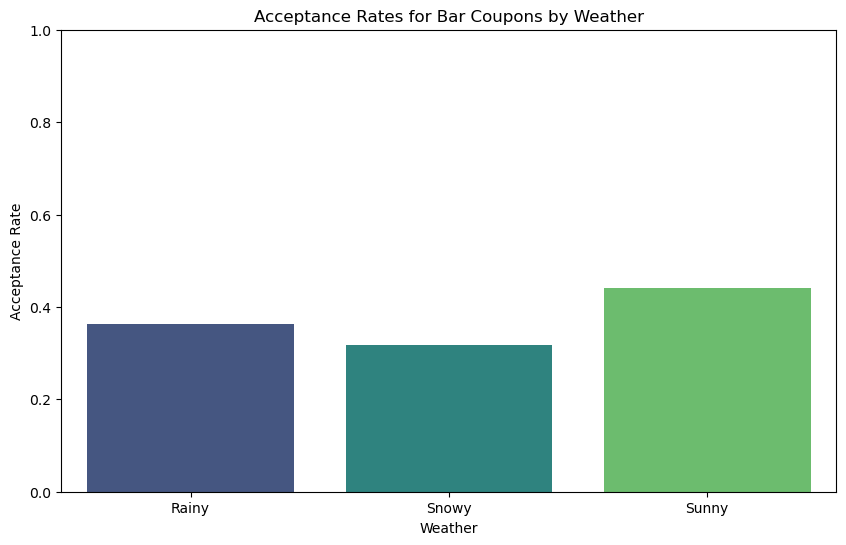

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/coupons.csv'
data = pd.read_csv(file_path)

# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values with the most frequent value (mode)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Create a new DataFrame that contains just the bar-related coupons
bar_coupon_label = label_encoders['coupon'].transform(['Bar'])[0]
bar_coupons = data_cleaned[data_cleaned['coupon'] == bar_coupon_label]

# Calculate acceptance rates for bar coupons by weather
acceptance_rate_weather = bar_coupons.groupby('weather')['Y'].mean()

# Map encoded weather back to original labels
weather_mapping = dict(zip(label_encoders['weather'].classes_, label_encoders['weather'].transform(label_encoders['weather'].classes_)))
acceptance_rate_weather.index = acceptance_rate_weather.index.map({v: k for k, v in weather_mapping.items()})

# Plot the acceptance rates by weather
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_rate_weather.index, y=acceptance_rate_weather.values, palette='viridis')
plt.title('Acceptance Rates for Bar Coupons by Weather')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.show()


**Loading and Cleaning the Data:**

1) The dataset is loaded, and the 'car' column is dropped.
2) Missing values are imputed with the most frequent value.

**Standardizing Occupation Labels:**

- The occupation labels are standardized to ensure consistency.

**Extracting and Verifying Unique Values:**

- Unique values for relevant columns are extracted and printed to verify.

**Encoding Categorical Variables:**

- Each categorical column is encoded using LabelEncoder.

**Filtering Bar-Related Coupons:**

- A new DataFrame containing only bar-related coupons is created.

**Categorization:**

- A new column is created to categorize users based on bar visit frequency, passenger, and occupation.

**Calculation and Plotting:**

1) Acceptance rates are calculated for each group.
2) The acceptance rates are plotted for comparison.
3) Acceptance rates are printed for clarity.
